### Treść zadania

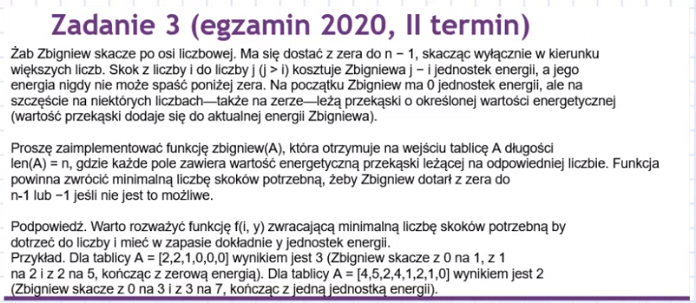

### Omówienie algorytmu

###### Bottom-up:
- Wypełniamy początkowo tablicę $ F $ o wymiarach $ n \times n $ wartościami $ \infty $, które interpretujemy jako brak możliwości dotarcia do danego pola o indeksie $ i $ (numer kolumny), posiadając dokładnie $ k $ pozostałej energii (numer wiersza),
- Wypełniamy pola, do których możemy dotrzeć z początkowego pola, posiadając przy tym odpowiednią pozostałą wartość energii, jedynkami. Tzn. np. na pierwszym polu (o indeksie $ 0 $) dostajemy $ 2 $ energii, więc możemy skoczyć na pole o indeksie $ 0 + 2 = 2 $ i zostanie nam $ 2 - 2 = 0 $ energii, więc zapisujemy $ F[2][0] = 1 $ lub możemy skoczyć na pole $ 0 + 1 = 1 $ i zostanie nam $ 2 - 1 = 1 $ energii, więc zapisujemy $ F[1][1] = 1 $,
- Ostatnim krokiem jest wypełnienie pozostałej części tablicy. Wystarczy przejść w pętli przez kolejne kolumny w kolejnych wierszach (począwszy od kolumny o indeksie 1, bo nie ma sensu zaglądać do kolumny o indeksie 0, odpowiadającej początkowemu położeniu, bo już je rozważyliśmy wyżej) i dla każdego pola $ F[i][j] $, dla którego zachodzi warunek $ F[i][j] \lt \infty $ (co interpretujemy jako fakt, iż możemy dotrzeć do tego pola, wykonując co najmniej $ F[i][j] $ skoków), wyznaczamy wszystkie pola, do których możemy dotrzeć oraz liczbę potrzebnych do tego skoków. Można zauważyć, że jeżeli sprawdzamy pewną komórkę $ F[i][j] $, oznacza to, że w danym momencie znajdujemy się na polu o indeksie $ j $ w tablicy wejściowej $ A $ i mamy w tym momencie dokładnie $ i $ energii do dyspozycji pozostałej po ostatnim skoku na to pole. W takiej sytuacji, nasza łączna energia w danym momencie wynosi $ i + A[i] $, bo należy jeszcze doliczyć energię zebraną na danym polu. Możemy więc skoczyć o maksymalnie $ i + A[i] $ pól w prawo, chyba, że wyskoczylibyśmy poza zakres. Musimy więc zawsze zredukować energię do maksymalnej potrzebnej do dotarcia na ostatnie pole, a więc zamiast sprawdzać wszystkie kolejne energie, jakie możemy wykorzystać na pojedynczy skok, redukujemy maksymalną wartość do $ min(n - 1 - j, A[j] + i) $. Wówczas dla każdego pola, na które możemy skoczyć, wyznaczamy minimalną liczbę skoków.

### Złożoność

###### Obliczeniowa
$ O(n^3) $, gdzie $ n $ - wielkość talicy $ A $. <br>
Taka złożoność wynika z tego, że możliwy jest przypadek, dla którego żab Zbigniew jest w stanie dotrzeć do każdego pola, mając każdą możliwą pozostałą ilość energii (limitujemy z góry przez $ n - j - 1 $, gdzie $ j $ jest indeksem pola, na którym się w danym momencie znajdujemy, bo nie potrzeba więcej energii, aby dotrzeć do celu), a z każdego pola, przy każdej możliwej ilości energii, musimy sprawdzić wszystkie pola, do których możemy dotrzeć, a więc maksymalnie $ n $ pól. Otrzymujemy więc $ O(n^2 \cdot n) = O(n^3) $
###### Pamięciowa
$ O(n^2) $

### Implementacja

#### Bottom-up

In [1]:
def zbigniew(A):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    
    # Fill the first column with zeros (no jumps required to get to the srarting
    # point as we are already there)
    for j in range(n):
        F[j][0] = 0
        
    # Set number of jumps required to get to the 'i'th field having still 'A[0] - i'
    # energy remaining with ones (one jump required). This is essential step as we
    # can go only tho these fields from the beginning one.
    for i in range(A[0]):
        F[min(i, n - 1)][min(A[0] - i, n - 1)] = 1
        
    # Fill the remaining fields of an array with appropriate values (minimum
    # number of steps required to get to such a field with the certain amount of
    # energy remaining).
    for i in range(n):  # i - energy
        for j in range(1, n):  # j - field index
            if F[i][j] < INF:
                energy = min(A[j] + i, n - 1 - j)
                # k is the remaining energy
                for k in range(energy):
                    # Limit an energy to the max value essential to reach the end
                    # (This step is required in order not to go out of the bounds
                    # of the F matrix (and to limit the memory required to cache values))
                    next_j = j + energy - k
                    # Store the minimum steps required to get to the 'next_j' index
                    F[k][next_j] = min(F[k][next_j], F[i][j] + 1)
    
    print(*F, sep='\n')
    return F[0][n - 1]

###### Kilka testów

In [2]:
A = [5, 0, 0, 0]
print(zbigniew(A))

[0, inf, inf, 1]
[0, inf, 2, 1]
[0, inf, inf, 1]
[0, 1, 1, inf]
1


In [3]:
A = [2, 2, 1, 0, 0, 0]
print(zbigniew(A))

[0, inf, 1, 2, 2, 3]
[0, 1, inf, 2, 3, inf]
[0, inf, 2, 3, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
3


In [4]:
A = [2, 3, 1, 1, 2, 0]
print(zbigniew(A))

[0, inf, 1, 2, 3, 2]
[0, 1, inf, inf, 2, inf]
[0, inf, inf, 2, inf, inf]
[0, inf, 2, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
2


### Drobna optymalizacja

W powyższym algorytmie niepotrzebnie kontynuujemy "skakanie", jeżeli nasza energia przekroczyła pozostały dystans do docelowego pola. Wówczas, zamiast w pętli aktualizować wszystkie pola, zapisujemy jedynie liczbę skoków do ostatniego pola (nie obchodzą nas już inne pola po drodze, bo wtedy musielibyśmy wykonać jeszcze przynajmniej jeden dodatkowy skok do ostatniego pola, a to nie ma najmniejszego sensu, ponieważ już teraz możemy doskoczyć do celu, więc nic nam to nie poprawi). Zauważmy również, że nie możemy przerwać od razu algorytmu, gdy spotka nas taka sytuacja, ponieważ nie wiemy, czy bieżąca seria skoków jest najlepsza. Wciąż może istnieć inne pole (lub to samo pole, ale dla innej wartości energii), do którego doskoczyliśmy, wykonując mniejszą liczbę skoków i z którego dzieli nas mniejsza liczba skoków do pola docelowego. Z tego powodu, kontynuujemy wykonywanie algorytmu, z tą jedną drobną modyfikacją (patrz niżej).

###### Wcześniej:

    energy = min(A[j] + i, n - 1 - j)
    # k is the remaining energy
    for k in range(energy):
        ...

###### Teraz:

    energy = A[j] + i
    if energy >= n - 1 - j:
        F[0][-1] = min(F[i][j] + 1, F[0][-1])
    else:
        # k is the remaining energy
        for k in range(energy):
            ...

##### Kod:

In [5]:
def zbigniew(A):
    n = len(A)
    INF = float('inf')
    F = [[INF] * n for _ in range(n)]
    
    # Fill the first column with zeros (no jumps required to get to the srarting
    # point as we are already there)
    for j in range(n):
        F[j][0] = 0
        
    # Set number of jumps required to get to the 'i'th field having still 'A[0] - i'
    # energy remaining with ones (one jump required). This is essential step as we
    # can go only tho these fields from the beginning one.
    for i in range(A[0]):
        F[min(i, n - 1)][min(A[0] - i, n - 1)] = 1
        
    # Fill the remaining fields of an array with appropriate values (minimum
    # number of steps required to get to such a field with the certain amount of
    # energy remaining).
    for i in range(n):  # i - energy
        for j in range(1, n):  # j - field index
            if F[i][j] < INF:
                energy = A[j] + i
                if energy >= n - 1 - j:
                    F[0][-1] = min(F[i][j] + 1, F[0][-1])
                else:
                    # k is the remaining energy
                    for k in range(energy):
                        # Limit an energy to the max value essential to reach the end
                        # (This step is required in order not to go out of the bounds
                        # of the F matrix (and to limit the memory required to cache values))
                        next_j = j + energy - k
                        # Store the minimum steps required to get to the 'next_j' index
                        F[k][next_j] = min(F[k][next_j], F[i][j] + 1)

    print(*F, sep='\n')
    return F[0][n - 1]

###### Kilka testów

In [6]:
A = [5, 0, 0, 0]
print(zbigniew(A))

[0, inf, inf, 1]
[0, inf, inf, 1]
[0, inf, inf, 1]
[0, 1, 1, inf]
1


In [7]:
A = [2, 2, 1, 0, 0, 0]
print(zbigniew(A))

[0, inf, 1, 2, 2, 3]
[0, 1, inf, 2, inf, inf]
[0, inf, 2, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
3


In [8]:
A = [2, 3, 1, 1, 2, 0]
print(zbigniew(A))

[0, inf, 1, 2, 3, 2]
[0, 1, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
[0, inf, inf, inf, inf, inf]
2
